In [1]:
import argparse
from   torch.utils.data import Dataset
import torch
from   DCAFormer import DCAFormerModel
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from   dataset_utils import myDataset,inversenormlization
from   train_networks import *

In [2]:
def test_main(model, test_loader, device):
    y_pred = []
    y_true = []
    val_epoch_loss = []
    model.eval()
    criterion = nn.MSELoss()
    with torch.no_grad():
        for index, (inputs, targets) in enumerate(test_loader):
            inputs = inputs.type(torch.FloatTensor).to(device)
            targets = targets.type(torch.FloatTensor).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            y_pred.append(outputs)
            y_true.append(targets)
            val_epoch_loss.append(loss.item())
        epoch_loss = np.mean(val_epoch_loss)
        y_pred = torch.cat(y_pred, 0).cpu().detach().numpy()
        y_true = torch.cat(y_true, 0).cpu().detach().numpy()
    return y_true, y_pred, epoch_loss

In [3]:
if __name__=="__main__":
    # 构造
    parser = argparse.ArgumentParser(description='TimesNet')
    #数据集参数
    parser.add_argument('--enc_in',     type=int,   default=12,        help='encoder input size')
    parser.add_argument('--seq_len',    type=int,   default=7,         help='input sequence length')
    parser.add_argument('--pred_len',   type=int,   default=1,         help='prediction sequence length')
    
    # Cross Variable Attention
    parser.add_argument('--d_model1',   type=int,   default=7,         help='dimension of Seq_len for  variable Attention')    
    parser.add_argument('--n_heads1',    type=int,   default=7,        help='num of heads')
    parser.add_argument('--d_ff1',       type=int,   default=640,      help='dimension of fcn')
    

    #Cross Time Attention   
    parser.add_argument('--d_model2',    type=int,   default=12,         help='dimension of Variables for time Attention')
    parser.add_argument('--n_heads2',    type=int,   default=4,         help='num of heads')
    parser.add_argument('--num_MLPlayer', default=1,help='learning the delta and tea MLP parameter')
    parser.add_argument('--hidden_dims',  default=[8],help='learning the delta and tea MLP parameter')
    parser.add_argument('--d_ff2',        type=int,   default=640,      help='dimension of fcn')
    
    #Same Parameters
    parser.add_argument('--e_layers',   type=int,   default=1,         help='num of encoder layers')
    parser.add_argument('--dropout',    type=float, default=0.1,       help='dropout')
    parser.add_argument('--activation', type=str,   default='relu',    help='activation')
    parser.add_argument('--output_attention',       default=False,     help='whether to output attention in ecoder')
    args = parser.parse_args([])
    
    # 训练参数
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    datamax=943
    datamin=920

    # 数据集
    train_loader =torch.load('../dataset/train_loader.pth')
    test_loader =torch.load('../dataset/test_loader.pth')
    max_epoches=50
    torch.manual_seed(1)

In [4]:
model= DCAFormerModel(args).to(device)
R2List=[]
for i in range(1):
    train_Transformer(model,train_loader, test_loader, max_epoches,'./', 'DCAFormer', device)
    model= DCAFormerModel(args).to(device)
    print('model structure:',model)
    model.load_state_dict(torch.load('./best_DCAFormer.pth'))
    print(model.alpha,model.belta)
    y_true, y_pred, epoch_loss=test_main(model, test_loader, device)
    R2=r2_score(y_true, y_pred)
    R2List.append(R2)
    print('\n测试集的相关系数：', r2_score(y_true, y_pred))

  0%|          | 0/50 [00:00<?, ?it/s]F:\Anaconda3\envs\PyTc\Lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
F:\Anaconda3\envs\PyTc\Lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  2%|▏         | 1/50 [00:08<06:58,  8.55s/it]

epoch: 0 train_epoch_loss: 0.05422516692741157 val_epoch_loss: 0.036725359768282825
best_test_loss  ------------------------------------------------- 0.036725359768282825


  4%|▍         | 2/50 [00:15<06:03,  7.58s/it]

epoch: 1 train_epoch_loss: 0.02686553920914997 val_epoch_loss: 0.016177061545020462
best_test_loss  ------------------------------------------------- 0.016177061545020462


  6%|▌         | 3/50 [00:22<05:41,  7.26s/it]

epoch: 2 train_epoch_loss: 0.01760226058871763 val_epoch_loss: 0.013665821052236718
best_test_loss  ------------------------------------------------- 0.013665821052236718


  8%|▊         | 4/50 [00:29<05:29,  7.15s/it]

epoch: 3 train_epoch_loss: 0.016916506144636155 val_epoch_loss: 0.013324320790297127
best_test_loss  ------------------------------------------------- 0.013324320790297127


 10%|█         | 5/50 [00:36<05:18,  7.09s/it]

epoch: 4 train_epoch_loss: 0.016126920507055192 val_epoch_loss: 0.012768137038377855
best_test_loss  ------------------------------------------------- 0.012768137038377855


 12%|█▏        | 6/50 [00:42<05:03,  6.91s/it]

epoch: 5 train_epoch_loss: 0.015276706428520113 val_epoch_loss: 0.012255620352393195
best_test_loss  ------------------------------------------------- 0.012255620352393195


 14%|█▍        | 7/50 [00:49<04:47,  6.68s/it]

epoch: 6 train_epoch_loss: 0.015102018986282098 val_epoch_loss: 0.011710337590823055
best_test_loss  ------------------------------------------------- 0.011710337590823055


 16%|█▌        | 8/50 [00:55<04:32,  6.48s/it]

epoch: 7 train_epoch_loss: 0.014242699849487214 val_epoch_loss: 0.011032493647022766
best_test_loss  ------------------------------------------------- 0.011032493647022766


 18%|█▊        | 9/50 [01:01<04:20,  6.35s/it]

epoch: 8 train_epoch_loss: 0.013928940056802916 val_epoch_loss: 0.01120104823574924


 20%|██        | 10/50 [01:07<04:10,  6.25s/it]

epoch: 9 train_epoch_loss: 0.013565600585401785 val_epoch_loss: 0.010691067437128074
best_test_loss  ------------------------------------------------- 0.010691067437128074


 22%|██▏       | 11/50 [01:13<04:01,  6.18s/it]

epoch: 10 train_epoch_loss: 0.013102350328786216 val_epoch_loss: 0.010476444537448882
best_test_loss  ------------------------------------------------- 0.010476444537448882


 24%|██▍       | 12/50 [01:19<03:54,  6.16s/it]

epoch: 11 train_epoch_loss: 0.012918780058774677 val_epoch_loss: 0.0108413458029744


 26%|██▌       | 13/50 [01:25<03:50,  6.22s/it]

epoch: 12 train_epoch_loss: 0.012651679464638126 val_epoch_loss: 0.011217903152021152


 28%|██▊       | 14/50 [01:31<03:42,  6.17s/it]

epoch: 13 train_epoch_loss: 0.011846628970864853 val_epoch_loss: 0.010979153405728428


 30%|███       | 15/50 [01:37<03:34,  6.14s/it]

epoch: 14 train_epoch_loss: 0.01170757945060767 val_epoch_loss: 0.009082083926688852
best_test_loss  ------------------------------------------------- 0.009082083926688852


 32%|███▏      | 16/50 [01:44<03:34,  6.32s/it]

epoch: 15 train_epoch_loss: 0.01114386074630204 val_epoch_loss: 0.010815602764574989


 34%|███▍      | 17/50 [01:51<03:33,  6.46s/it]

epoch: 16 train_epoch_loss: 0.011268808797116097 val_epoch_loss: 0.010165783155600601


 36%|███▌      | 18/50 [01:57<03:23,  6.37s/it]

epoch: 17 train_epoch_loss: 0.0108827046246215 val_epoch_loss: 0.009643401654095156


 38%|███▊      | 19/50 [02:03<03:15,  6.31s/it]

epoch: 18 train_epoch_loss: 0.010129651966930407 val_epoch_loss: 0.011025231496278725


 40%|████      | 20/50 [02:09<03:07,  6.25s/it]

epoch: 19 train_epoch_loss: 0.010149961971782393 val_epoch_loss: 0.01105207987644928


 42%|████▏     | 21/50 [02:15<03:00,  6.21s/it]

epoch: 20 train_epoch_loss: 0.009865761434088438 val_epoch_loss: 0.010793335034324423


 44%|████▍     | 22/50 [02:22<02:59,  6.39s/it]

epoch: 21 train_epoch_loss: 0.009358951433353777 val_epoch_loss: 0.011512097354941173


 46%|████▌     | 23/50 [02:29<02:56,  6.53s/it]

epoch: 22 train_epoch_loss: 0.009193770965339227 val_epoch_loss: 0.011912367187535218


 48%|████▊     | 24/50 [02:35<02:46,  6.42s/it]

epoch: 23 train_epoch_loss: 0.009197752387499591 val_epoch_loss: 0.013010540945493455


 50%|█████     | 25/50 [02:41<02:37,  6.31s/it]

epoch: 24 train_epoch_loss: 0.008296830384957092 val_epoch_loss: 0.012457172616245037


 52%|█████▏    | 26/50 [02:47<02:29,  6.25s/it]

epoch: 25 train_epoch_loss: 0.008413732556458532 val_epoch_loss: 0.013430956499673226


 54%|█████▍    | 27/50 [02:53<02:22,  6.19s/it]

epoch: 26 train_epoch_loss: 0.008086085173590498 val_epoch_loss: 0.011256038521882176


 56%|█████▌    | 28/50 [02:59<02:14,  6.13s/it]

epoch: 27 train_epoch_loss: 0.007944049473127551 val_epoch_loss: 0.012863378584887687


 58%|█████▊    | 29/50 [03:05<02:08,  6.10s/it]

epoch: 28 train_epoch_loss: 0.00748341189467471 val_epoch_loss: 0.01201602866777032


 60%|██████    | 30/50 [03:11<02:01,  6.07s/it]

epoch: 29 train_epoch_loss: 0.007288214809009763 val_epoch_loss: 0.013429339415471342


 62%|██████▏   | 31/50 [03:17<01:54,  6.05s/it]

epoch: 30 train_epoch_loss: 0.007373963013776553 val_epoch_loss: 0.012420006872118958


 64%|██████▍   | 32/50 [03:23<01:48,  6.04s/it]

epoch: 31 train_epoch_loss: 0.006847928056974547 val_epoch_loss: 0.013953337029673298


 66%|██████▌   | 33/50 [03:30<01:42,  6.04s/it]

epoch: 32 train_epoch_loss: 0.007013302737354254 val_epoch_loss: 0.014243491964434944


 68%|██████▊   | 34/50 [03:36<01:36,  6.03s/it]

epoch: 33 train_epoch_loss: 0.006650595834504737 val_epoch_loss: 0.015432351245518446


 70%|███████   | 35/50 [03:42<01:30,  6.02s/it]

epoch: 34 train_epoch_loss: 0.006618086056931491 val_epoch_loss: 0.015060391413543027


 72%|███████▏  | 36/50 [03:48<01:24,  6.02s/it]

epoch: 35 train_epoch_loss: 0.006071291040179177 val_epoch_loss: 0.014317965913813355


 74%|███████▍  | 37/50 [03:54<01:18,  6.05s/it]

epoch: 36 train_epoch_loss: 0.006267828840014519 val_epoch_loss: 0.012582971755041545


 76%|███████▌  | 38/50 [04:00<01:12,  6.07s/it]

epoch: 37 train_epoch_loss: 0.006281665865436729 val_epoch_loss: 0.012644988746424427


 78%|███████▊  | 39/50 [04:06<01:07,  6.17s/it]

epoch: 38 train_epoch_loss: 0.005864575445804599 val_epoch_loss: 0.014067398129642947


 80%|████████  | 40/50 [04:13<01:03,  6.39s/it]

epoch: 39 train_epoch_loss: 0.005179963205804328 val_epoch_loss: 0.01321136993130729


 82%|████████▏ | 41/50 [04:20<00:59,  6.57s/it]

epoch: 40 train_epoch_loss: 0.005871021098202023 val_epoch_loss: 0.01350217861595562


 84%|████████▍ | 42/50 [04:27<00:53,  6.75s/it]

epoch: 41 train_epoch_loss: 0.00511879728713143 val_epoch_loss: 0.014328364790931265


 86%|████████▌ | 43/50 [04:34<00:47,  6.80s/it]

epoch: 42 train_epoch_loss: 0.005247161673376912 val_epoch_loss: 0.013505278697446174


 88%|████████▊ | 44/50 [04:41<00:41,  6.84s/it]

epoch: 43 train_epoch_loss: 0.004611575292293634 val_epoch_loss: 0.014709915148805227


 90%|█████████ | 45/50 [04:48<00:34,  6.87s/it]

epoch: 44 train_epoch_loss: 0.00511842441867294 val_epoch_loss: 0.013957420685455286


 92%|█████████▏| 46/50 [04:55<00:27,  6.90s/it]

epoch: 45 train_epoch_loss: 0.004750291638254871 val_epoch_loss: 0.015592536931253122


 94%|█████████▍| 47/50 [05:02<00:20,  6.93s/it]

epoch: 46 train_epoch_loss: 0.004467060132319835 val_epoch_loss: 0.014629305508745551


 96%|█████████▌| 48/50 [05:09<00:13,  6.99s/it]

epoch: 47 train_epoch_loss: 0.004622714540370841 val_epoch_loss: 0.01579601706456869


 98%|█████████▊| 49/50 [05:16<00:07,  7.07s/it]

epoch: 48 train_epoch_loss: 0.004468220946923146 val_epoch_loss: 0.015384231315795572


100%|██████████| 50/50 [05:23<00:00,  6.48s/it]

epoch: 49 train_epoch_loss: 0.004540326077509811 val_epoch_loss: 0.015789082867359545
model structure: DCAFormerModel(
  (crossVariable_encoder): Encoder(
    (attn_layers): ModuleList(
      (0): EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): FullAttention(
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (query_projection): Linear(in_features=7, out_features=7, bias=True)
          (key_projection): Linear(in_features=7, out_features=7, bias=True)
          (value_projection): Linear(in_features=7, out_features=7, bias=True)
          (out_projection): Linear(in_features=7, out_features=7, bias=True)
        )
        (conv1): Conv1d(7, 640, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(640, 7, kernel_size=(1,), stride=(1,))
        (norm1): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )


In [5]:
print('均值：',np.mean(R2List))
print('All:',R2List )

均值： 0.7627323759763125
All: [0.7627323759763125]


In [6]:
import torch.nn as nn
import torch.optim as optim

train_data=[]
train_target_data=[]
for index, (inputs, targets) in enumerate(train_loader):
    train_data.append(inputs)
    train_target_data.append(targets)
train_data=torch.cat(train_data,0)
train_target_data=torch.cat(train_target_data,0)
test_data=[]
test_target_data=[]
for index, (inputs, targets) in enumerate(test_loader):
    test_data.append(inputs)
    test_target_data.append(targets)
test_data=torch.cat(test_data,0)
test_target_data=torch.cat(test_target_data,0)
print(test_data.shape,test_target_data.shape)

torch.Size([62, 7, 12]) torch.Size([62])


(663, 7, 11, 11)
(663, 4, 7, 7)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6')])

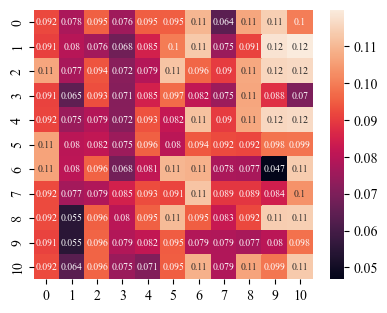

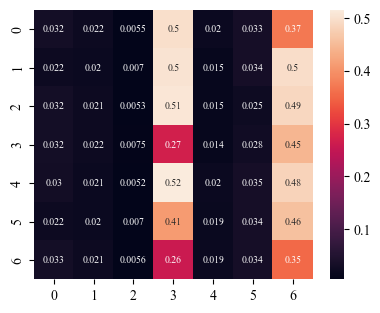

In [7]:
args.output_attention=True
model= DCAFormerModel(args).to(device)
model.load_state_dict(torch.load('./best_DCAFormer.pth'))
outputs,att1,att2 = model(train_data.to(device))
atten_matrix1=att1[0].cpu().detach().numpy()
atten_matrix2=att2[0].cpu().detach().numpy()

print(atten_matrix1.shape)#[B, H, D, D]
print(atten_matrix2.shape)#[B, H, D, D]
atten_matrix1=atten_matrix1[0]#第一个样本
atten_matrix2=atten_matrix2[0]#第一个样本
plt.figure(figsize=[4.5,3.5])
sn1=sns.heatmap(atten_matrix1.mean(axis=0),annot=True,annot_kws={"font":"Times New Roman","fontsize":7})
cbar = sn1.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbarlabels = cbar.ax.get_yticklabels() 
[label.set_fontname('Times New Roman') for label in cbarlabels]
plt.xticks(fontproperties='Times New Roman', size=10)
plt.yticks(fontproperties='Times New Roman', size=10)

plt.figure(figsize=[4.5,3.5])
sn2=sns.heatmap(atten_matrix2.mean(axis=0),annot=True,annot_kws={"font":"Times New Roman","fontsize":7})
cbar = sn2.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbarlabels = cbar.ax.get_yticklabels() 
[label.set_fontname('Times New Roman') for label in cbarlabels]
plt.xticks(fontproperties='Times New Roman', size=10)
plt.yticks(fontproperties='Times New Roman', size=10)